<a href="https://colab.research.google.com/github/jithendra1798/ML-CS-GY-6923-B/blob/main/03_ML_cs_gy_6923-B_hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(
    csv_path, delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement',
           'horsepower', 'weight', 'acceleration',
           'model year', 'origin', 'car name'])

print(df.shape)
df.head()

/tmp/ipython-input-3835944077.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(csv_path, delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


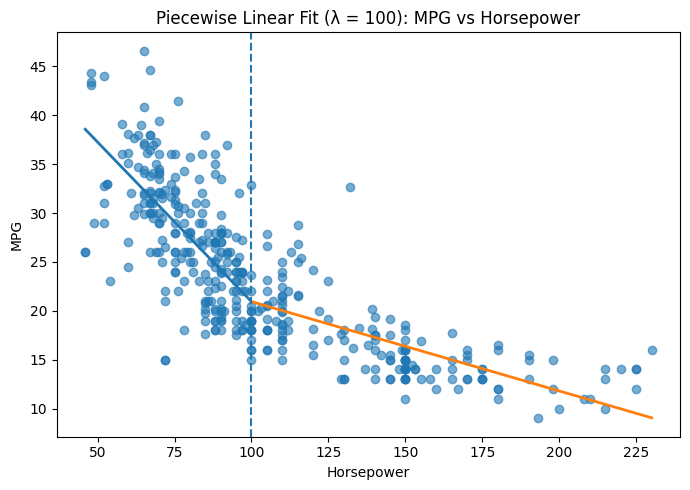

Estimated parameters:
a1 = 53.5772
s1 = -0.3264
s2 = -0.0914

Piecewise model:
f(x) = a1 + s1*x,                 for x < 100.0
f(x) = a1 + s1*100.0 - s2*100.0 + s2*x,  for x >= 100.0


In [3]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df = df[['mpg', 'horsepower']].dropna().copy()

df = df[df['horsepower'].apply(lambda v: np.isfinite(v))]
df = df[df['mpg'].apply(lambda v: np.isfinite(v))]

y = df['mpg'].to_numpy().astype(float)
x = df['horsepower'].to_numpy().astype(float)

lam = 100.0
h = np.maximum(0.0, x - lam)
X = np.column_stack([np.ones_like(x), x, h])

beta_hat, residuals, rank, svals = np.linalg.lstsq(X, y, rcond=None)
b0, b1, b2 = beta_hat

a1 = b0
s1 = b1
s2 = b1 + b2

def f_hat(x_val):
    return b0 + b1 * x_val + b2 * np.maximum(0.0, x_val - lam)

x_left = np.linspace(x.min(), min(lam, x.max()), 200)
x_right = np.linspace(max(lam, x.min()), x.max(), 200)

y_left = a1 + s1 * x_left
y_right = (a1 + s1*lam - s2*lam) + s2 * x_right

print(7*'\n')
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_left, y_left, linewidth=2)
plt.plot(x_right, y_right, linewidth=2)
plt.axvline(lam, linestyle='--')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Piecewise Linear Fit (λ = 100): MPG vs Horsepower')
plt.tight_layout()
plt.show()

print("Estimated parameters:")
print(f"a1 = {a1:.4f}")
print(f"s1 = {s1:.4f}")
print(f"s2 = {s2:.4f}")

print("\nPiecewise model:")
print(f"f(x) = a1 + s1*x,                 for x < {lam}")
print(f"f(x) = a1 + s1*{lam} - s2*{lam} + s2*x,  for x >= {lam}")
